In [2]:
import rbo
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
data=pd.read_csv("RBO-Role-Repayment.csv")

In [4]:
ar_rank=data[data['ROLES']=='ARCHITECT']
te_rank=data[data['ROLES']=='TECHNICAL']
ma_rank=data[data['ROLES']=='MANAGEMENT']

In [5]:
roles=['ARCHITECT','TECHNICAL','MANAGEMENT']
p_values=np.arange(0.5, 0.98, 0.01)

In [6]:
rboDF=pd.DataFrame(columns = ['roles' , 'p', 'RBO'])
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            for p_val in p_values:
                #print(countries[i]+"-"+countries[j]+","+str(p))
                rbo_ext=rbo.rbo(data[data['ROLES']==roles[i]]['REPAYMENT'], data[data['ROLES']==roles[j]]['REPAYMENT'], p=p_val)
                #rboDF=rboDF.append({'Countries':'CO-CHI','p':0.5,'RBO':99},ignore_index=True)
                rboDF=rboDF.append({'roles':roles[i]+"-"+roles[j],'p':p_val,'RBO':rbo_ext['ext']},ignore_index=True)
            
        

In [7]:
rbo_ext=rbo.rbo(data[data['ROLES']==roles[0]]['REPAYMENT'], data[data['ROLES']==roles[1]]['REPAYMENT'], p=0.95)
rbo_ext

{'min': 0.4580531074123997,
 'res': 0.1530070536510471,
 'ext': 0.5544039747933829}

In [8]:
rboDF.sample(10)

,roles,p,RBO
98,MANAGEMENT-TECHNICAL,0.52,0.714272
113,MANAGEMENT-TECHNICAL,0.67,0.638852
120,MANAGEMENT-TECHNICAL,0.74,0.612854
132,MANAGEMENT-TECHNICAL,0.86,0.597182
75,MANAGEMENT-ARCHITECT,0.77,0.740890
135,MANAGEMENT-TECHNICAL,0.89,0.600828
23,TECHNICAL-ARCHITECT,0.73,0.567493
101,MANAGEMENT-TECHNICAL,0.55,0.697948
104,MANAGEMENT-TECHNICAL,0.58,0.682075
48,MANAGEMENT-ARCHITECT,0.50,0.913001


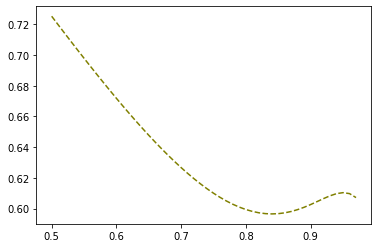

In [9]:
plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']=='MANAGEMENT-TECHNICAL'], color='olive', linestyle='dashed', label=roles[i]+"-"+roles[j])

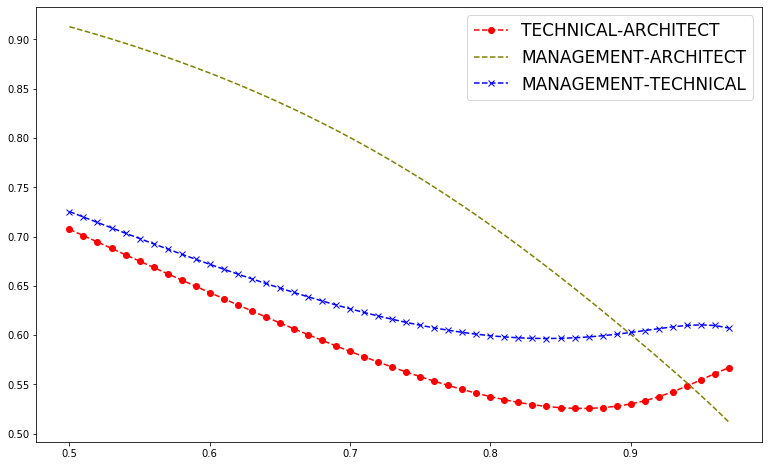

In [10]:
colors=['red','olive','blue','black','green','orange']
markers=['o','','x','o','','x']
plt.figure(figsize=(13,8))
count=0
for i in range(len(roles)):
    for j in range(len(roles)):
        if i>j:
            
            pair=roles[i]+"-"+roles[j]
            plt.plot( 'p', 'RBO', data=rboDF[rboDF['roles']==pair], marker=markers[count], color=colors[count]
                     , linestyle='dashed', label=pair)
            count=count+1
plt.legend(prop={'size': 17})


In [22]:
rbo.rbo(ma_rank['CAUSE'], ar_rank['CAUSE'], p=.85)

{'min': 0.6187234011190773,
 'res': 2.4722272533446445e-06,
 'ext': 0.6187247516599744}